# Tarea 9

## Entrega: miércoles, 28 de octubre de 2015

[Debido a un error en el planteamiento de la tarea 8, de la tarea 8 sólo se tomará en cuenta la pregunta 1. Aquí se replantea la pregunta 2 de la tarea 8.]

Una ecuación ligeramente distinta en apariencia, pero radicalmente distinta en comportamiento, de la ecuación de difusión es la siguiente ecuación de **reacción-difusión**; el primer término se puede considerar como modelando una reacción química local, o el crecimiento local de una población de animales:

$$
\frac{\partial u}{\partial t} = u(1-u) + \nabla^2 u. 
$$

[1] Considera la ecuación de reacción-difusión en 1D. 

(i) Considera estados **espacialmente uniformes** de la ecuación, es decir, que no dependan del espacio, tal que la derivada espacial desaparece. Encuentra las soluciones estacionarias de la EDO correspondiente. ¿Cuál es estable y cuál es inestable? Es decir, si comienzo cerca de cada uno, ¿me quedo cerca?, o ¿me alejo?

**Solución:**

Como desaparece la derivada espacial, la ecuación de reacción-difusión se vuelve

$$
\frac{\partial u}{\partial t} = u (1-u). 
$$

Es fácil ver que si $u_0 = 0$ en algún punto, entonces $\frac{\partial u}{\partial t} = 0$. Esto también pasa para $u_0 = 1$. La estable es $u_0 = 1$. En efecto, si perturbamos la solución, i.e. $u' = 1+\epsilon$, entonces $\frac{\partial u}{\partial t} = -\epsilon(1+\epsilon)$, i.e. para $\epsilon > 0$, $\frac{\partial \epsilon}{\partial t} < 0$ y vice versa, que es suficiente para la estabilidad. De otro lado, para $u_0=0$, la situación es contraria, ya que para si $u$ es ligeramente mayor a 0, entonces $\frac{\partial \epsilon}{\partial t} > 0$ y vice versa, lo cual implica un equilibrio inestable

(ii) Utiliza las condiciones de frontera particulares de Dirichlet siguientes: $u(0) = a$ y $u(L) = b$, donde $a$ y $b$ son los valores estacionarios de la ecuación que encontraste en la pregunta (i). Como condición inicial, utiliza todos ceros excepto en las fronteras. Simula la evolución del sistema por bastante tiempo. Puedes utilizar Euler (o sea, la discretización más sencilla en el tiempo). No guardes todos los pasos intermedios para que no se trabe tu computadora.

**Solución:**

Usamos el FTCS para obtener:

$$
\frac{u^{t+1}_x - u_x^t}{k} = u_x^t (1 - u_x^t) + \frac{u_{x+1}^t - 2u_x^t + u^t_{x-1}}{h^2}
$$

De donde obtenemos la ecuación de evolución:

$$
u_x^{t+1} = u_x^t + ku_x^t (1 - u_x^t) + \frac{k(u_{x+1}^t - 2u_x^t + u^t_{x-1})}{h^2}
$$

La estabilidad de la solución requiere que $\frac{k}{h^2} \leq \frac12$. Si usamos una malla uniforme con longitud espacial $L$ y temporal $T$, entonces esta condición se traduce a

$$
N_T \geq 2T \frac{N_L^2}{L^2} \: ,
$$
donde $N_L$ y $N_T$ son los números de divisiones de sus escalas respectivas. En código:

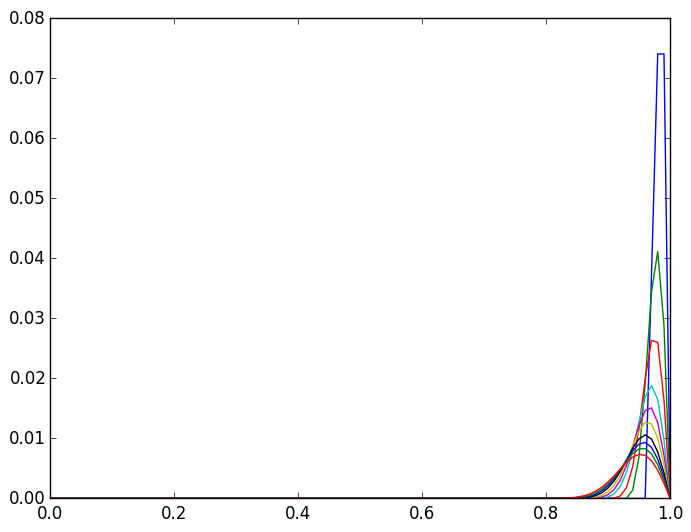

In [9]:
using PyPlot;

L = 1 # Longitud espacial
T = 1 # Longitud temporal

N_L = 100 # Número de divisiones longitudinales
N_T = Int(max(N_L, ceil(3*T*N_L^2/(L^2)))) # Número de divisiones temporales que garantiza estabilidad

k = T/N_T
h = L/N_L

mesh = Array{Float64}(N_T, N_L) # Creamos la malla
fill!(mesh, 0) # Y la llenamos de ceros

# Ahora especificamos las condiciones iniciales (como una delta de Dirac)
mesh[1,1] = 0
mesh[1, N_L] = 1

for t in 1:(N_T-1)
    for x in 2:(N_L-1)
        mesh[t+1,x] = mesh[t,x] + k*mesh[t,x]*(1-mesh[t,x]) + (k*(mesh[t, x+1] - 2*mesh[t,x] + mesh[t,x-1]))/(h^2)
    end
end

(iii) Dibuja sólo unas cuantas gráficas que ilustren la evolución (e.g. 10 figuras). [Recuerda que puedes generar una nueva figura con `figure()`. Puedes utilizar el operador de módulo `%` para seleccionar sólo ciertos pasos de tiempo, e.g. `if i % 100 == 0`.] Ponlas también en una animación si puedes. ¿Qué observas? Descríbelo con la máxima precisión que puedas.

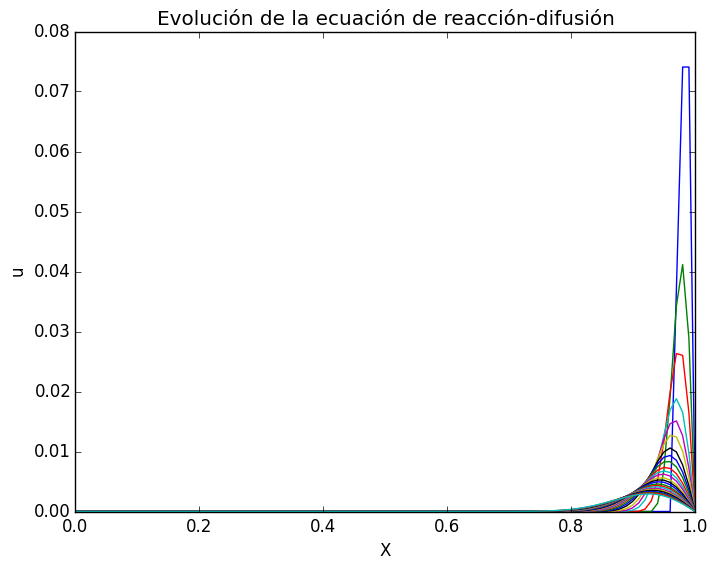

PyObject <matplotlib.text.Text object at 0x7f90babd1c88>

In [13]:
# Graficamos algunas gráficas
for t in [ceil(n*N_L/30) for n in 1:25]
    plot(linspace(0, L, N_L), transpose(mesh[ceil(t),:]), "-");
end
xlabel("X")
ylabel("u")
title("Evolución de la ecuación de reacción-difusión")

(iv) Ahora utiliza condiciones periódicas, con una condición inicial localizada y chica, es decir, como una delta, pero de magnitud chica, digamos 0.1. ¿Qué observas? ¿Cómo se relaciona con la pregunta (i)?

(v) Debes haber visto algún tipo de esparcimiento en el espacio. Para calcular qué tan rápido se esparce, calcula en el tiempo el número de sitios del sistema cuyo valor $u_i$ excede un cierto umbral, e.g. $0.9a$. Dibuja una gráfica de esta cantidad en función del tiempo para calcular un tipo de velocidad. Compara esto con la tasa de esparcimiento de difusión que conoces (por ejemplo, por el desplazamiento cuadrático medio).

(vi) ¿Qué concluyes acerca del comportamiento físico de este sistema? Interprétalo en el contexto de las reacciones o de los animales, y contrástalo con la difusión pura.

[2] (i) Simula la ecuación en 2D con condiciones periódicas y una condición inicial que es una delta chiquita de nuevo. ¿Observas el mismo comportamiento físico?

(ii) Utiliza una condición inicial que es 1 en un cuadrado chico. ¿Qué observas?

(iii) ¿Qué conclusión general sacas acerca del comportamiento físico de esta ecuación y lo que modela?